# Data preprocessing

## Objective: 
### 1- Categorical to Numerical
### 2- Normalization
### 3- Statistical analysis 
### 4- Outliers removal 

## Bank Marketing Campaigns Dataset 
Source: [UCI ML dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)


The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets: <br>
1) __"bank-additional-full.csv"__ with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010) <br>
2) __"bank-additional.csv"__ with 10% of the examples (4119), randomly selected from 1), and 20 inputs. <br>
3) __"bank-full.csv"__ with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). <br>
4) __"bank.csv"__ with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). <br>

# Attribute Information(Input variables)
## Bank client data:
1 - age (numeric)<br>
2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
## Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). <br>
__Important note:__ this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
## Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
## Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

## Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>



## The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv("dataset/bank/bank.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Check if dataset is imbalanced 
data["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [5]:
# Handle Marital Col
# Map: single=0; others=1
def handle_marital(value):
    return (0 if value == 'single' else 1)

data["marital"] = data["marital"].apply(handle_marital) 

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [187]:
# Handle Housing 
# Map: no==0; others==1
data["housing"] = data["housing"].map({
    "no": 0,
    "yes": 1
    }.get)
# Handle Loan
# Map: no==0; others==1
data["loan"] = data["loan"].replace({
    "no": 0,
    "yes": 1
}, inplace=True)


In [188]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [189]:
# Handle Job
data["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [190]:
data["job"].replace({
    'unemployed': 8,
    'services': 6,
    'management': 0,
    'blue-collar': 3,
    'self-employed': 7,
    'technician':1, 
    'entrepreneur': 2, 
    'admin.':5, 
    'student': 10,
    'housemaid': 9, 
    'retired': 4, 
    'unknown': np.nan
}, inplace=True)


In [191]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [192]:
# Handle Education
data["education"].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [193]:
data["education"].replace({
    'primary': 2, 
    'secondary': 1, 
    'tertiary': 0,
    'unknown': np.nan
}, inplace=True)

In [194]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [195]:
# Handle default(Credit card)  
data["default"].unique()

array(['no', 'yes'], dtype=object)

In [196]:
data["default"].replace({
    'no': 0, 
    'yes': 1
}, inplace=True)

In [197]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [198]:
# Normalize Balance 
# using MinMax Normalization for every row, apply lambda 
# x = (x - min) / (max - min) 
print(data["balance"].min())
print(data["balance"].max())
data["balance"] = data["balance"].apply(lambda x: (x - data["balance"].min()) / (data["balance"].max() - data["balance"].min())) 

-3313
71188


In [199]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [200]:
# Handle Contact
data.contact.unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [201]:
data["contact"].replace({
    'cellular': 1, 
    'unknown': np.nan, 
    'telephone': 0
}, inplace=True)


In [202]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,oct,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,may,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,apr,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,may,226,1,-1,0,unknown,no


In [203]:
# Handle Month 
data.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [204]:
data.month.replace({
    'oct': 10, 
    'may': 5, 
    'apr': 4, 
    'jun': 6, 
    'feb': 2, 
    'aug': 8, 
    'jan': 1, 
    'jul': 7, 
    'nov': 11,
    'sep': 9, 
    'mar': 3, 
    'dec': 12
}, inplace=True )

In [205]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,unknown,no


In [206]:
# Normalize Pdays
data["pdays"] = data["pdays"].apply(lambda x: (x - data["pdays"].min()) / (data["pdays"].max() - data["pdays"].min())) 

In [207]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,unknown,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,failure,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,failure,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,unknown,no


In [208]:
# Handle Poutcome
data.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [209]:
data.poutcome.replace({
    'unknown': np.nan, 
    'failure': 0, 
    'other': 1, 
    'success': 2
}, inplace=True)

In [ ]:
data.head()

In [211]:
# Normalize Duration 
data["duration"] = data["duration"].apply(lambda x: (x - data["duration"].min()) / (data["duration"].max() - data["duration"].min())) 

In [212]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,no
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,no
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,no
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,no


In [213]:
# Handle class label y
data.y.replace({
    'yes': 1,
    'no': 0
}, inplace=True)

In [214]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0


In [215]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,10.576211,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [216]:
# Save data
data.to_csv("dataset/bank/bank-pped.csv", index=False)
# Load new data 
df = pd.read_csv("dataset/bank/bank-pped.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,8.0,1,2.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,6.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,0.0,0,0.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,0.0,1,0.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [217]:
# Correlation 
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.001264,0.410768,0.190484,-0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
job,0.001264,1.000000,-0.004633,0.329417,-0.000494,-0.027549,-0.031556,-0.000807,-0.071647,-0.013250,-0.066394,0.010792,-0.019756,-0.010806,0.002621,0.050381,0.005100
marital,0.410768,-0.004633,1.000000,0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,0.190484,0.329417,0.169967,1.000000,0.011623,-0.056585,0.072716,0.024752,-0.117748,-0.017107,-0.083234,0.011193,-0.009714,-0.011531,-0.030396,-0.023715,-0.055368
default,-0.017885,-0.000494,-0.007391,0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.083820,-0.027549,-0.007525,-0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,-0.031556,0.041449,0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,-0.011250,-0.000807,0.048496,0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,-0.204200,-0.071647,-0.056938,-0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.017853,-0.013250,-0.006769,-0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


In [259]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [14, 14]
plt.rcParams['font.size'] = 14

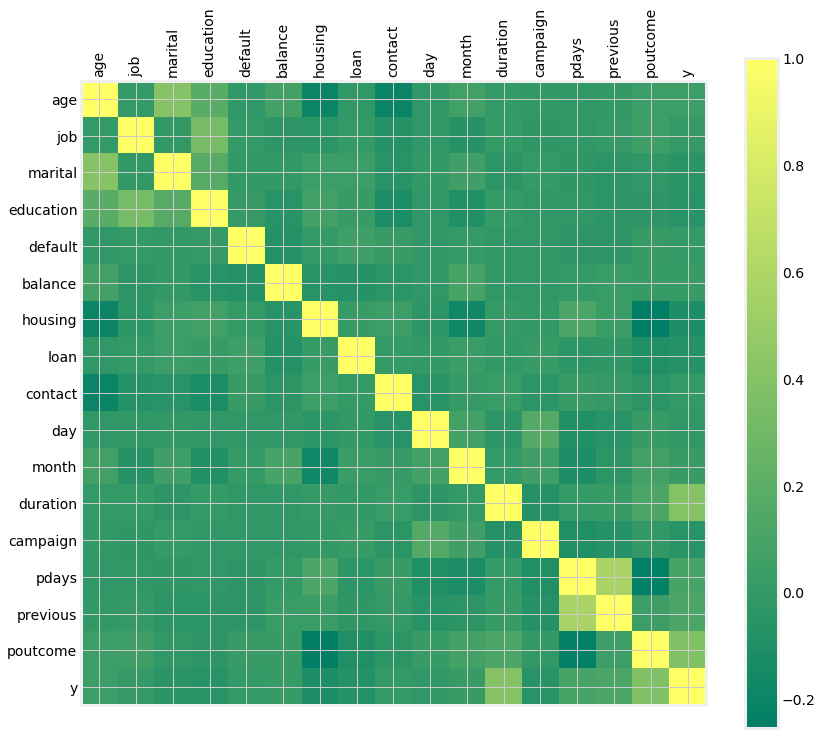

In [246]:
plt.matshow(df.corr(), cmap="summer", fignum=plt.figure(figsize=(14,12)).number)
plt.colorbar()

plt.xticks(list(range(len(df.columns))), df.columns, rotation='vertical')
plt.yticks(list(range(len(df.columns))), df.columns, rotation='horizontal')
plt.show()

In [229]:
# Find out which features are correlated to response variable y 
df.corr()['y'].sort_values(ascending=False)

y            1.000000
duration     0.401118
poutcome     0.396350
previous     0.116714
pdays        0.104087
age          0.045092
month        0.023335
balance      0.017905
job          0.005100
default      0.001303
contact     -0.002108
day         -0.011244
marital     -0.045815
education   -0.055368
campaign    -0.061147
loan        -0.070517
housing     -0.104683
Name: y, dtype: float64

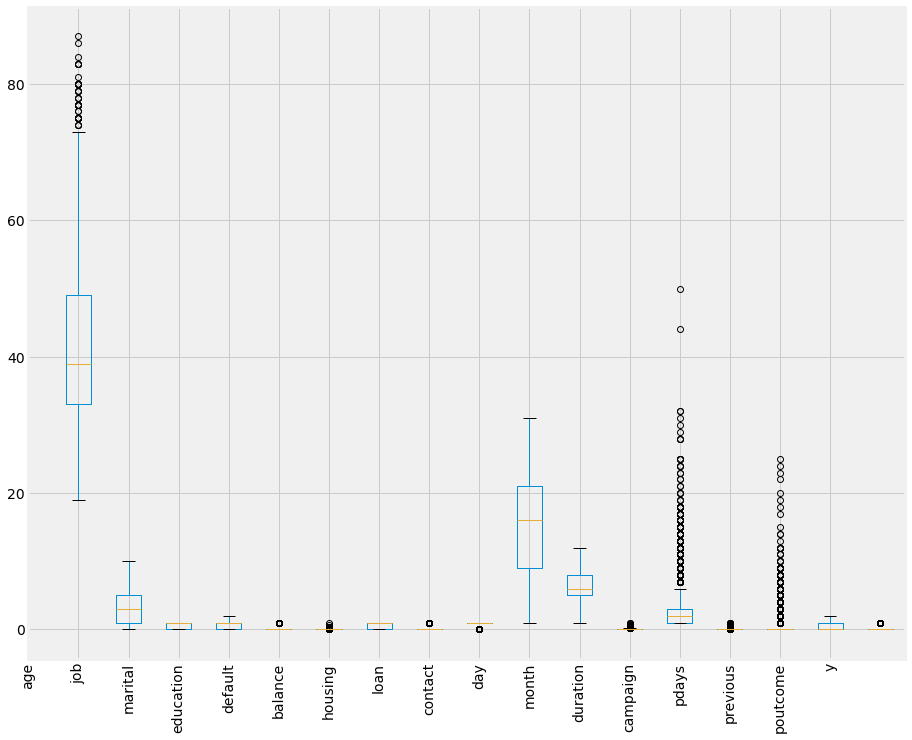

In [261]:
# Remove outliers 
df.plot.box(figsize=(14,12))
plt.xticks(list(range(len(df.columns))), df.columns, rotation='vertical')
plt.show()

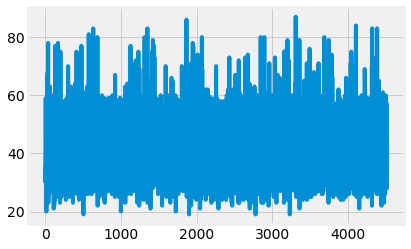

In [253]:
# Plot age 
plt.plot(df.age.values)
plt.show()

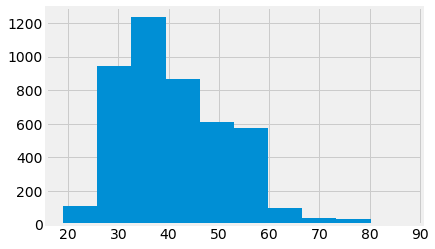

In [254]:
# Plot age histogram
plt.hist(df.age.values)
plt.show()

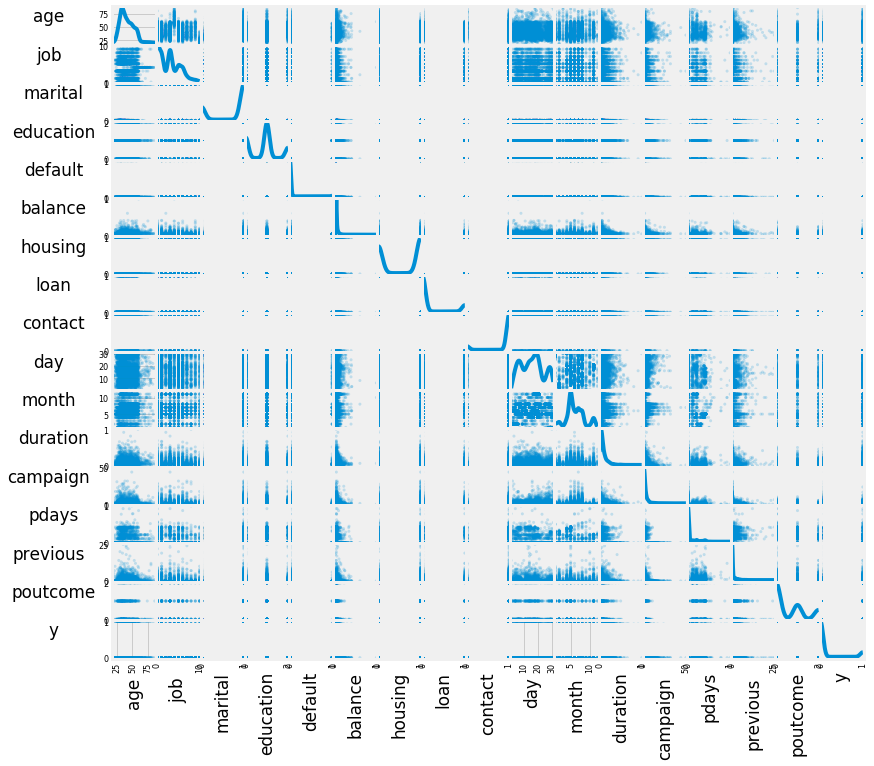

In [258]:
# Plot Correlation Matrix 
axs = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(12,12), diagonal='kde')
n = len(df.columns)
for x in range(n):
    for y in range(n):
        ax = axs[x, y]
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50
plt.show()

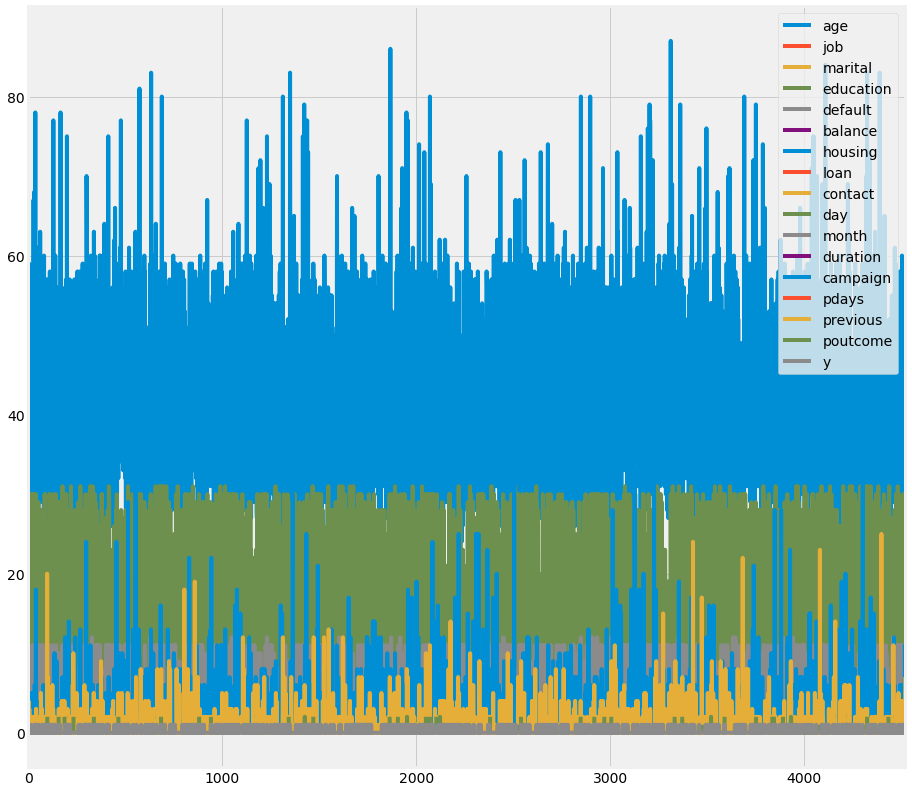

In [260]:
df.plot()

In [294]:
# Remove outliers from Age 
# set and get the quantile range(using threshold) by assuming that: 
# 1% lower age / 1% upper age ==> are outliers
low = 0.01
high = 0.99
q_df = df.quantile([low,high])

In [266]:
# Apply to the dataset 
# Only take the in-between values 1% < x < 99%
df.age = df.age.apply(lambda x: x if q_df.age[low] < x < q_df.age[high] else np.nan)

In [267]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4406.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.057876,3.102164,0.735457,0.844947,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,9.751862,2.675571,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,71.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [280]:
# drop NaN within age
df.age.dropna(inplace=True)

array([30., 33., 35., 59., 36., 39., 41., 43., 31., 40., 56., 37., 25.,
       38., 42., 44., 26., 55., 67., 53., 68., 32., 49., 52., 34., 61.,
       45., 48., 57., 54., 63., 51., 29., 50., 27., 60., 28., 58., 46.,
       47., 70., 65., 64., 62., 66., 71., 69.])

In [288]:
# Save dataset 
df.to_csv("dataset/bank/bank-pped-1.csv", index=False)

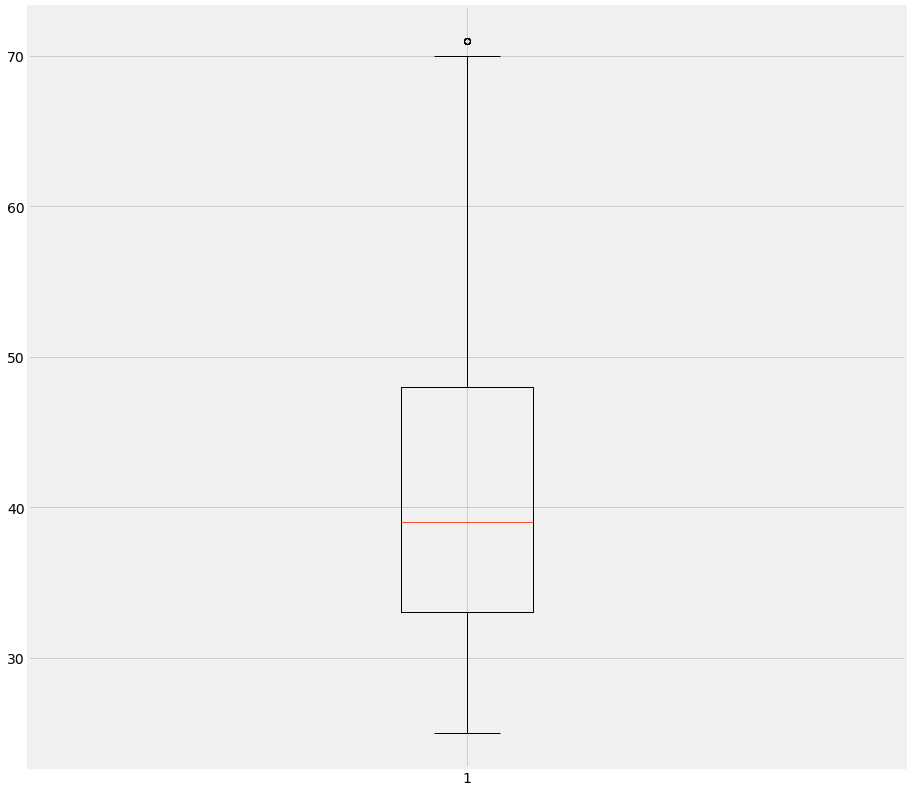

In [281]:
plt.boxplot(df.age)
plt.show()

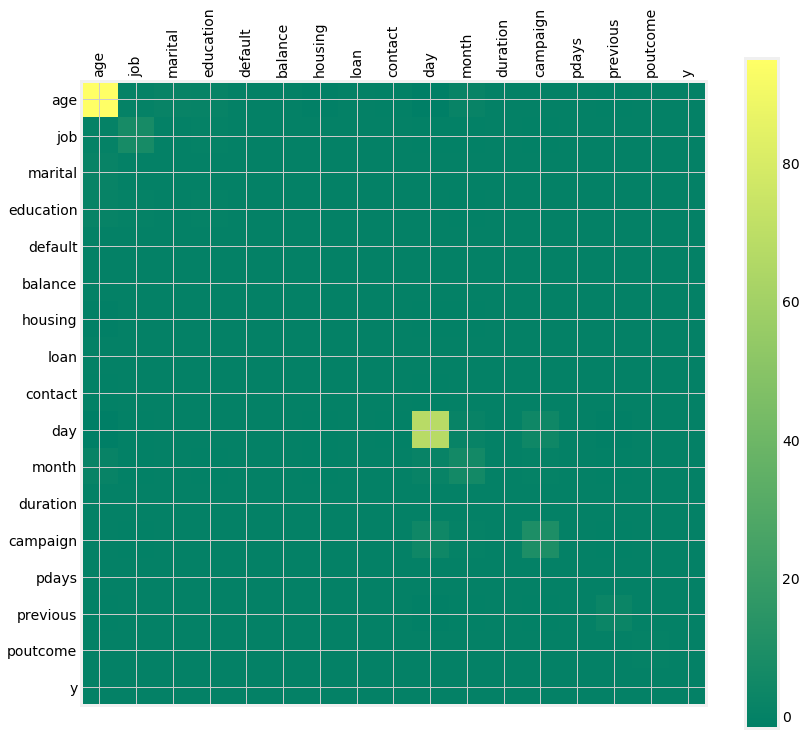

In [293]:
# Plot covariance 
plt.matshow(df.cov(), cmap="summer", fignum=plt.figure(figsize=(14,12)).number)
plt.colorbar()

plt.xticks(list(range(len(df.columns))), df.columns, rotation='vertical')
plt.yticks(list(range(len(df.columns))), df.columns, rotation='horizontal')
plt.show()

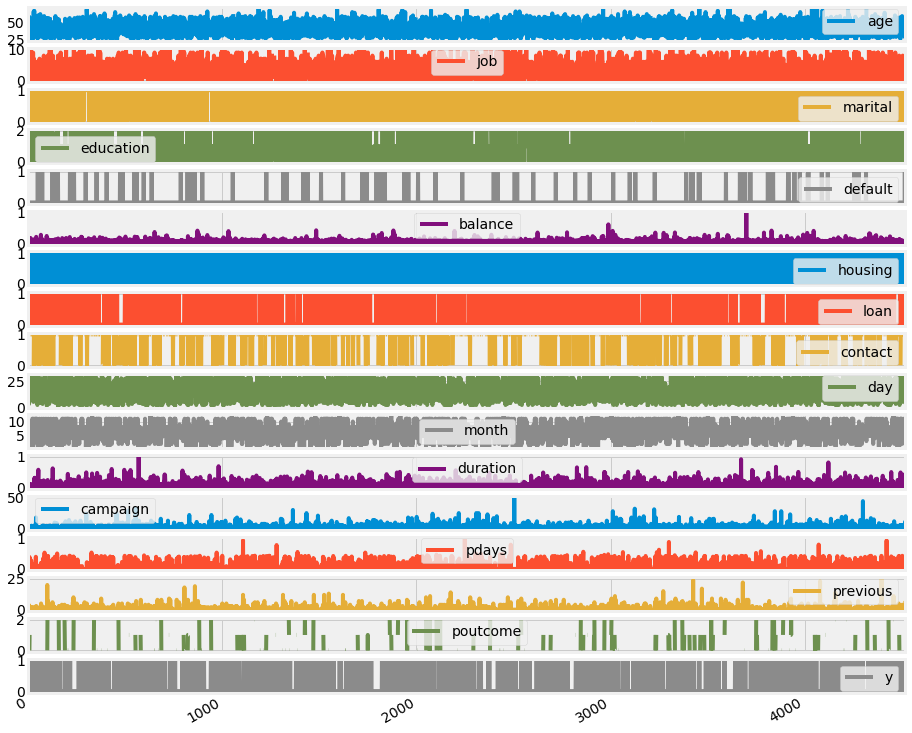

In [287]:
# Plot every column individualy
df.plot(subplots=True )
plt.show()

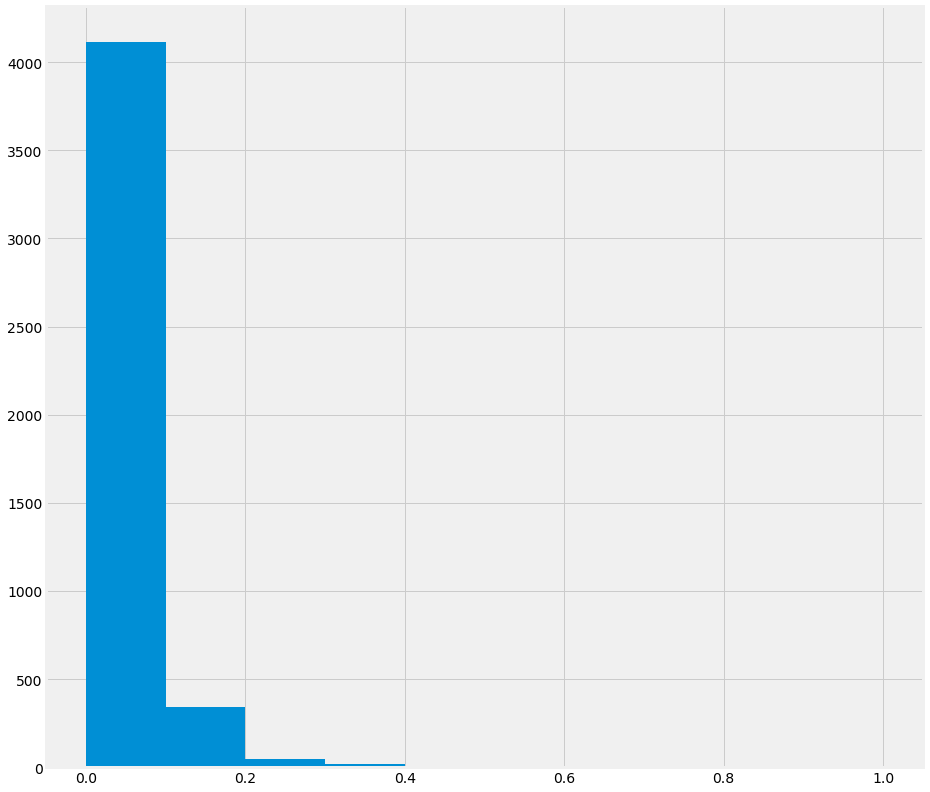

In [290]:
# Plot Balance distribution 
plt.hist(df.balance.values)
plt.show()

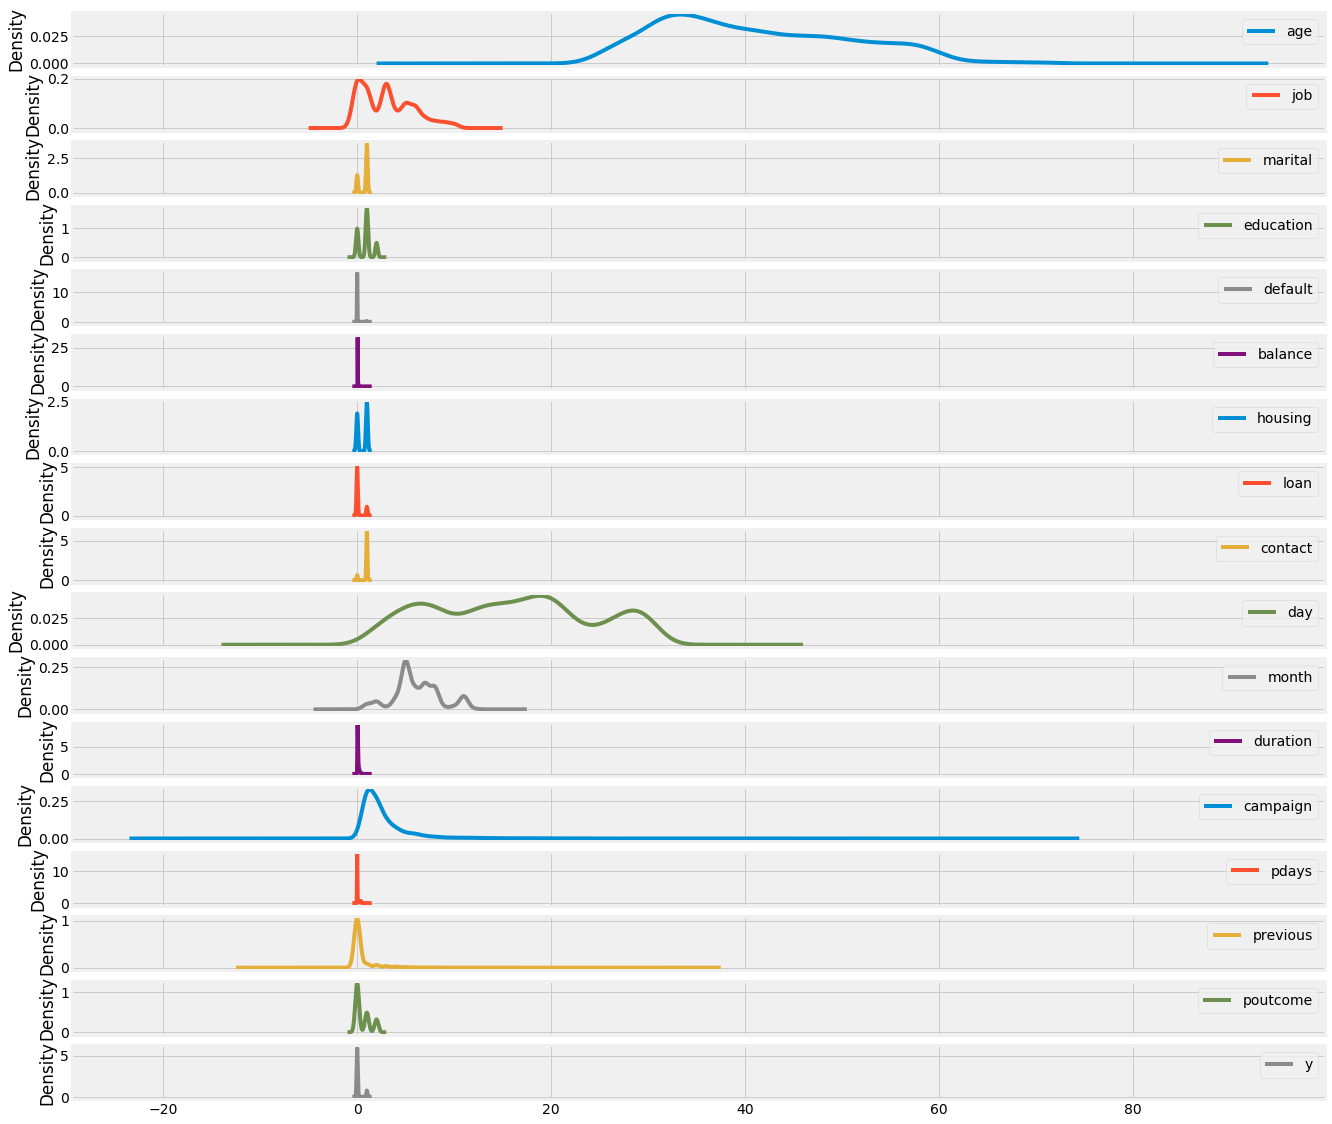

In [292]:
# Plot distribution for every columns 
df.plot.kde(subplots=True, figsize=(20,20))
plt.show()